<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/lmfit_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template for fitting data using the lmfit package 

MPF 2021-01-17

_To make best use of this template, `Edit > Clear all outputs`, then run desired cells sequentially_

Install lmfit; for docs see: https://lmfit.github.io/lmfit-py/

If already installed, can comment out next line, or just not run the cell


In [ ]:
!pip install lmfit

Then, import the required libraries

In [2]:
from lmfit import Model # requires lmfit be installed already
import numpy as np # https://numpy.org/
import matplotlib.pyplot as plt 
# for matplotlib tutorial see: https://matplotlib.org/tutorials/index.html
import pandas as pd # https://pandas.pydata.org/

Next, we define x and y data arrays. We can either specify the values in the code, as here:

In [ ]:
# replace these numbers with your data
# (must have same number of x and y values)
x = np.array([0,1,2,3,4,5,6,7])
y = np.array([0. , 0.5, 0.67, 0.75, 0.8,0.83, 0.86, 0.875])
df = pd.DataFrame({"X":x,"Y":y}) # replace "X" and "Y" with col names
df

Or, if instead of typing the x/y values into vectors we want to read them 
from a file, it's convenient to use pandas. Place/upload a csv file with the data into a folder accessible by your Jupyter server, then replace 'filename.csv'  with the name of (or path to) your data file. 

Below, we assume the file `binding-data-1.csv` has been placed in the current directory. In Colab, that's in "Files".

In [3]:
df = pd.read_csv('binding-data-1.csv', comment="#")
df # this command on its own will output the contents of the data frame

,[L],Y_monomer,Y_tetramer
0,0.25,0.180,0.0000
1,1.00,0.460,0.0125
2,2.50,0.700,0.0450
3,4.00,0.790,0.1000
4,7.00,0.860,0.2700
5,10.00,0.900,0.5000
6,13.00,0.920,0.6800
7,16.00,0.935,0.7800
8,19.00,0.950,0.8550
9,25.00,0.960,0.9225


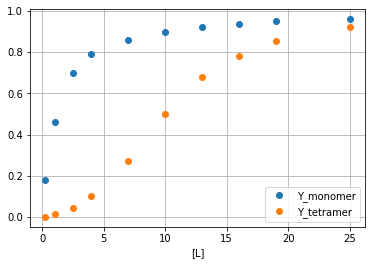

In [4]:
# plot the data (specifying x column)
df.plot(x=0, style=' ', marker='o') # x values in col 0
plt.grid(); plt.show()

Define the function(s) to fit the data:

In [ ]:
def quadratic(x,K):
  return (K+x+Mt-((K+x+Mt)**2-4*x*Mt)**(0.5))/(2*Mt)
  # this function could be modified to include an amplitude fitted param
  # as in A*(K+x+Mt-((K+x+Mt)**2-4*x*Mt)**(0.5))/(2*Mt)
  # requires the value Mt be externally defined

In [5]:
def hyperbolic(x, K):
  return x/(x+K)

In [ ]:
def Hill(x,K,n):
  return <expression> # replace <expression> with the code for the Hill eqn.

Having read the data into a dataframe, and specified a function to be fit, we create a _fitting object_, here called `mod`, that knows the function to fit. Then, we instruct the object to fit that equation to the specified $x$ and $y$ data, storing the results in a new object, called `result`. (NB: the names of objects are arbitrary, but it's helpful if they are somewhat informative.)

In [7]:
# perform the fit using lmfit; specify "good" starting guesses
K0 = 1 # initial guess for parameter K
mod = Model(hyperbolic)
x = df.iloc[:,0]
y = df.iloc[:,1] # specify which y values to fit
result = mod.fit(y, x=x, K = K0) 

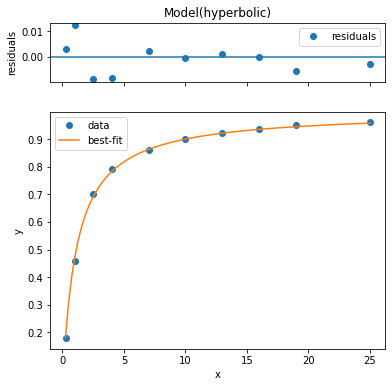

In [8]:
# plot the result
result.plot(numpoints=100) # numpoints is for best fit line
plt.show()

In [9]:
# report the parameters
print(result.fit_report())

[[Model]]
    Model(hyperbolic)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 10
    # variables        = 1
    chi-square         = 3.5268e-04
    reduced chi-square = 3.9187e-05
    Akaike info crit   = -100.525265
    Bayesian info crit = -100.222680
[[Variables]]
    K:  1.11757127 +/- 0.01584742 (1.42%) (init = 1)


In [20]:
# access individual parameters by name:
print('K: {:.3f} ± {:.3f} µM'.format(
    result.params['K'].value,
    result.params['K'].stderr))

K: 1.118 ± 0.016 µM
